In [ ]:
# VCG Auction with non-linear welfare

In [7]:
from math import sqrt

In [1]:
%matplotlib inline                              
                                                # magic MATPLOTLIB initialization

import numpy as np                              # NUMPY is very popular math package for Python
                                                # largerly inspired by Matlab
                                                                
import matplotlib                               # MATPLOTLIB is very popular charting package for Python
from matplotlib import pyplot as plt            # PYPLOT is simple charting API

In [173]:
alpha = 0.1 # -0.1...0.1

z0 = (-1 + sqrt(1 + 4 * 2 * alpha)) / 2 / alpha if abs(alpha) > 0 else 2

def f1(z):
    return 0.5 * (z + alpha * z**2) + 0.5

def df1(z):
    return 0.5 + alpha * z

def f2(z):
    return 1.0 * (z + alpha * z**2) - 0.5

def df2(z):
    return 1.0 + 2 * alpha * z

def f3(z):
    return max(0, f1(z), f2(z))

def df3(z):
    return df1(z) if f1(z) > f2(z) else df2(z)

def df3x(z):
    return df1(z) if z < z0 else df2(z)

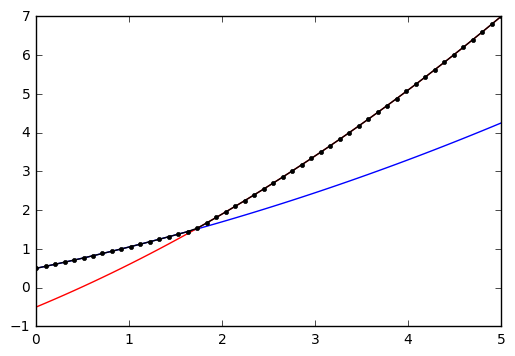

In [174]:
x = np.linspace(0, 5, 50)
y = map(f1, x)
z = map(f2, x)
f = map(f3, x)
plt.plot(x, y, '-b', x, z, '-r', x, f, '.-k')

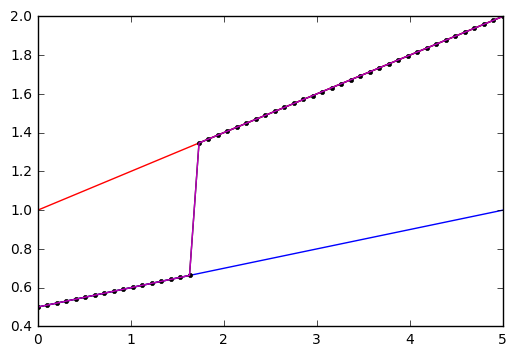

In [175]:
dy = map(df1, x)
dz = map(df2, x)
df = map(df3, x)
dfx = map(df3x, x)
plt.plot(x, dy, '-b', x, dz, '-r', x, df, '.-k', x, dfx, '-m')

In [176]:
def w(b):
    return b * (df2(b) + df2(0)) / 2 - (f3(b) - f3(0))

In [177]:
def p(w):
    return (-1 + sqrt(1 + 4 * w * alpha)) / 2 / alpha

In [178]:
print w(5), w(4), w(3)
print p(w(5))

1.0 1.0 1.0
0.9160797831
